In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import shap
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import pickle
import warnings
warnings.filterwarnings('ignore')

In [150]:
# read pickle file into python
infile = open(r'C:\A\Education\Data Science\Relax Inc\adopted_user','rb')
adopted_user= pickle.load(infile)
infile.close()

In [151]:
adopted_user.head(100)

,time_stamp,user_id,visited,adopted
0,2014-04-22,1,1,0
1,2013-11-15,2,1,0
2,2013-11-29,2,1,0
3,2013-12-09,2,1,0
4,2013-12-25,2,1,0
5,2013-12-31,2,1,0
6,2014-01-08,2,1,0
7,2014-02-03,2,1,1
8,2014-02-08,2,1,1
9,2014-02-09,2,1,1


In [152]:
adopted_user=adopted_user.drop(['time_stamp','visited'], axis=1).drop_duplicates()

In [153]:
adopted_user.reset_index(drop=True)

,user_id,adopted
0,1,0
1,2,0
2,2,1
3,3,0
4,4,0
5,5,0
6,6,0
7,7,0
8,10,0
9,10,1


In [154]:
adopted_user=adopted_user.groupby(['user_id'],as_index=False).max()

In [155]:
adopted_user.head()

,user_id,adopted
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


In [156]:
adopted_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 2 columns):
user_id    8823 non-null int64
adopted    8823 non-null int64
dtypes: int64(2)
memory usage: 206.8 KB


In [157]:
user=pd.read_csv(r'C:\A\Education\Data Science\Relax Inc\takehome_users.csv',encoding='latin-1')

In [158]:
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,22-04-2014 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,15-11-2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,19-03-2013 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,21-05-2013 8:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,17-01-2013 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [159]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [160]:
df_full=user.merge(adopted_user,left_on='object_id',right_on='user_id',how='left')

In [161]:
df_full.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,adopted
0,1,22-04-2014 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0
1,2,15-11-2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2.0,1.0
2,3,19-03-2013 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,3.0,0.0
3,4,21-05-2013 8:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,4.0,0.0
4,5,17-01-2013 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,5.0,0.0


In [162]:
# drop 'name', 'email', 'user_id'
df=df_full.drop(['name','email','user_id'], axis=1)

In [163]:
df['last_session_creation_time'].value_counts(dropna=False)

NaN             3177
1.401868e+09       2
1.401917e+09       2
1.400783e+09       1
1.387907e+09       1
1.354262e+09       1
1.400790e+09       1
1.346755e+09       1
1.387828e+09       1
1.354275e+09       1
1.387836e+09       1
1.354284e+09       1
1.369762e+09       1
1.387843e+09       1
1.387847e+09       1
1.400788e+09       1
1.377565e+09       1
1.354298e+09       1
1.354303e+09       1
1.380393e+09       1
1.387863e+09       1
1.387805e+09       1
1.354310e+09       1
1.399306e+09       1
1.354364e+09       1
1.354314e+09       1
1.387875e+09       1
1.354326e+09       1
1.387882e+09       1
1.354330e+09       1
                ... 
1.365623e+09       1
1.365626e+09       1
1.378765e+09       1
1.399191e+09       1
1.349438e+09       1
1.399195e+09       1
1.399198e+09       1
1.366827e+09       1
1.365653e+09       1
1.365657e+09       1
1.365658e+09       1
1.399217e+09       1
1.365668e+09       1
1.399228e+09       1
1.399271e+09       1
1.399230e+09       1
1.399231e+09 

In [164]:
# fill missing values with 0
df['last_session_creation_time']=df.last_session_creation_time.fillna(0)

In [165]:
df['invited_by_user_id'].value_counts(dropna=False)

NaN        5583
10741.0      13
2527.0       12
1525.0       11
2308.0       11
11770.0      11
4612.0       10
7012.0       10
10481.0      10
4803.0       10
6370.0       10
4302.0       10
8068.0       10
1175.0       10
2354.0       10
10628.0      10
2922.0        9
8426.0        9
6645.0        9
9023.0        9
6493.0        9
3721.0        9
9434.0        9
3789.0        9
6808.0        9
3944.0        9
7698.0        9
4551.0        9
7716.0        9
8554.0        9
           ... 
644.0         1
8152.0        1
294.0         1
1944.0        1
7879.0        1
7587.0        1
5938.0        1
8139.0        1
11857.0       1
5885.0        1
1875.0        1
8890.0        1
1784.0        1
1509.0        1
3928.0        1
2831.0        1
1158.0        1
7348.0        1
2578.0        1
4747.0        1
7658.0        1
3455.0        1
5454.0        1
1586.0        1
11293.0       1
7941.0        1
4134.0        1
6101.0        1
129.0         1
594.0         1
Name: invited_by_user_id

In [166]:
# fill missing values with 0
df['invited_by_user_id']=df.invited_by_user_id.fillna(0)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 9 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    12000 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            12000 non-null float64
adopted                       8823 non-null float64
dtypes: float64(3), int64(4), object(2)
memory usage: 937.5+ KB


In [168]:
df['adopted'].value_counts(dropna=False)

0.0    7167
NaN    3177
1.0    1656
Name: adopted, dtype: int64

In [169]:
# convert Nan to 6 and drop these rows
df['adopted']=df.adopted.fillna(6)

In [170]:
df=df[df['adopted']!=6]

In [171]:
df['adopted'].value_counts(dropna=False)

0.0    7167
1.0    1656
Name: adopted, dtype: int64

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 11999
Data columns (total 9 columns):
object_id                     8823 non-null int64
creation_time                 8823 non-null object
creation_source               8823 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      8823 non-null int64
enabled_for_marketing_drip    8823 non-null int64
org_id                        8823 non-null int64
invited_by_user_id            8823 non-null float64
adopted                       8823 non-null float64
dtypes: float64(3), int64(4), object(2)
memory usage: 689.3+ KB


In [173]:
df.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,22-04-2014 3:53,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,15-11-2013 3:45,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,19-03-2013 23:14,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,21-05-2013 8:09,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,17-01-2013 10:14,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0


In [174]:
# convert orject_id to categorical data type
df['object_id']=df['object_id'].astype(str)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 11999
Data columns (total 9 columns):
object_id                     8823 non-null object
creation_time                 8823 non-null object
creation_source               8823 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      8823 non-null int64
enabled_for_marketing_drip    8823 non-null int64
org_id                        8823 non-null int64
invited_by_user_id            8823 non-null float64
adopted                       8823 non-null float64
dtypes: float64(3), int64(3), object(3)
memory usage: 689.3+ KB


In [176]:
df['creation_source'].value_counts(dropna=False)

ORG_INVITE            3188
SIGNUP                1898
GUEST_INVITE          1588
SIGNUP_GOOGLE_AUTH    1385
PERSONAL_PROJECTS      764
Name: creation_source, dtype: int64

In [177]:
# create dummy valuables for the column of creation_source, rename the columns and drop the first and original column
creation_source_dummies = pd.get_dummies(df['creation_source'],drop_first=True).rename(columns=lambda x: 'creation_source_' + str(x))
df = pd.concat([df, creation_source_dummies], axis=1)
df=df.drop(columns=['creation_source',], axis=1)

In [178]:
# convert last_session_creation_time to categorical data type
df['last_session_creation_time']=df['last_session_creation_time'].astype(str)

In [179]:
df['opted_in_to_mailing_list'].value_counts(dropna=False)

0    6597
1    2226
Name: opted_in_to_mailing_list, dtype: int64

In [180]:
df['enabled_for_marketing_drip'].value_counts(dropna=False)

0    7482
1    1341
Name: enabled_for_marketing_drip, dtype: int64

In [181]:
df['org_id'].value_counts(dropna=False)

0      228
1      172
2      150
3      125
4      122
6      102
9       91
7       88
5       87
10      68
8       67
14      66
17      58
12      57
11      56
18      54
20      50
13      50
33      47
15      47
22      46
25      44
31      44
24      44
16      44
23      43
27      43
28      42
21      41
34      40
      ... 
273      9
361      9
359      9
310      9
358      9
383      9
364      9
336      9
352      9
381      9
323      8
294      8
315      8
365      8
183      8
304      8
378      8
344      8
355      7
329      7
232      7
395      7
412      7
353      6
396      6
322      6
400      6
397      5
386      4
416      2
Name: org_id, Length: 417, dtype: int64

In [182]:
# convert org_id to categorical data type
df['org_id']=df['org_id'].astype(str)

In [183]:
# convert invited_by_user_id to categorical data type
df['invited_by_user_id']=df['invited_by_user_id'].astype(str)

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 11999
Data columns (total 12 columns):
object_id                             8823 non-null object
creation_time                         8823 non-null object
last_session_creation_time            8823 non-null object
opted_in_to_mailing_list              8823 non-null int64
enabled_for_marketing_drip            8823 non-null int64
org_id                                8823 non-null object
invited_by_user_id                    8823 non-null object
adopted                               8823 non-null float64
creation_source_ORG_INVITE            8823 non-null uint8
creation_source_PERSONAL_PROJECTS     8823 non-null uint8
creation_source_SIGNUP                8823 non-null uint8
creation_source_SIGNUP_GOOGLE_AUTH    8823 non-null uint8
dtypes: float64(1), int64(2), object(5), uint8(4)
memory usage: 654.8+ KB


In [185]:
df['creation_time_year'] = df['creation_time'].str[6:10]

In [186]:
df['creation_time_month'] = df['creation_time'].str[3:5]

In [187]:
df.head()

,object_id,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,creation_time_year,creation_time_month
0,1,22-04-2014 3:53,1398138810.0,1,0,11,10803.0,0.0,0,0,0,0,2014,04
1,2,15-11-2013 3:45,1396237504.0,0,0,1,316.0,1.0,1,0,0,0,2013,11
2,3,19-03-2013 23:14,1363734892.0,0,0,94,1525.0,0.0,1,0,0,0,2013,03
3,4,21-05-2013 8:09,1369210168.0,0,0,1,5151.0,0.0,0,0,0,0,2013,05
4,5,17-01-2013 10:14,1358849660.0,0,0,193,5240.0,0.0,0,0,0,0,2013,01


In [188]:
# merge two columns (datatype:string)
df["creation"] = df['creation_time_year'].map(str) + df['creation_time_month']

In [189]:
df.head()

,object_id,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,creation_time_year,creation_time_month,creation
0,1,22-04-2014 3:53,1398138810.0,1,0,11,10803.0,0.0,0,0,0,0,2014,04,201404
1,2,15-11-2013 3:45,1396237504.0,0,0,1,316.0,1.0,1,0,0,0,2013,11,201311
2,3,19-03-2013 23:14,1363734892.0,0,0,94,1525.0,0.0,1,0,0,0,2013,03,201303
3,4,21-05-2013 8:09,1369210168.0,0,0,1,5151.0,0.0,0,0,0,0,2013,05,201305
4,5,17-01-2013 10:14,1358849660.0,0,0,193,5240.0,0.0,0,0,0,0,2013,01,201301


In [190]:
df=df.drop(['creation_time','creation_time_year','creation_time_month'], axis=1)

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 11999
Data columns (total 12 columns):
object_id                             8823 non-null object
last_session_creation_time            8823 non-null object
opted_in_to_mailing_list              8823 non-null int64
enabled_for_marketing_drip            8823 non-null int64
org_id                                8823 non-null object
invited_by_user_id                    8823 non-null object
adopted                               8823 non-null float64
creation_source_ORG_INVITE            8823 non-null uint8
creation_source_PERSONAL_PROJECTS     8823 non-null uint8
creation_source_SIGNUP                8823 non-null uint8
creation_source_SIGNUP_GOOGLE_AUTH    8823 non-null uint8
creation                              8823 non-null object
dtypes: float64(1), int64(2), object(5), uint8(4)
memory usage: 654.8+ KB


In [205]:
df.head(100)

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,creation
0,1,1398138810.0,1,0,11,10803.0,0.0,0,0,0,0,201404
1,2,1396237504.0,0,0,1,316.0,1.0,1,0,0,0,201311
2,3,1363734892.0,0,0,94,1525.0,0.0,1,0,0,0,201303
3,4,1369210168.0,0,0,1,5151.0,0.0,0,0,0,0,201305
4,5,1358849660.0,0,0,193,5240.0,0.0,0,0,0,0,201301
5,6,1387424226.0,0,0,197,11241.0,0.0,0,0,0,0,201312
6,7,1356009872.0,0,1,37,0.0,0.0,0,0,1,0,201212
9,10,1401833283.0,1,1,318,4143.0,1.0,1,0,0,0,201301
10,11,1388116554.0,0,0,69,0.0,0.0,0,0,1,0,201312
12,13,1396196378.0,0,0,254,11204.0,0.0,1,0,0,0,201403


In [192]:
# Create arrays for the features and the response variable
y = df['adopted'].values
X = df.drop('adopted', axis=1).values

In [193]:
# Create train and test sets
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X,y,test_size=0.25,random_state=42)

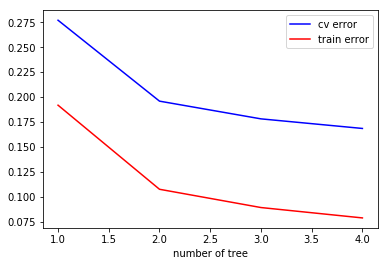

In [204]:
# random forest model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV

n_list=[1,2,3,4]
cv_err=[]
train_err=[]
for n in n_list:
    clf=RandomForestClassifier(n_estimators=n)
    clf.fit(Xlr, ylr)
    sig_clf=CalibratedClassifierCV(clf)
    sig_clf.fit(Xlr, ylr)
    
    predict_y=sig_clf.predict_proba(Xtestlr)
    cv_err.append(log_loss(ytestlr, predict_y))
    
    predict_y=sig_clf.predict_proba(Xlr)
    train_err.append(log_loss(ylr, predict_y))

plt.plot(n_list, cv_err, label='cv error', c='b')
plt.plot(n_list, train_err, label='train error', c='r')
plt.xlabel('number of tree')
plt.legend()
plt.show()

In [198]:
clf=RandomForestClassifier(n_estimators=n_list[np.argmin(cv_err)])
clf.fit(Xlr, ylr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [197]:
from sklearn.metrics import accuracy_score
accuracy_score(ytestlr, clf.predict(Xtestlr))

0.9320036264732547

In [199]:
feature_names=['object_id','last_session_creation_time','opted_in_to_mailing_list','enabled_for_marketing_drip','org_id','invited_by_user_id','creation_source_ORG_INVITE','creation_source_PERSONAL_PROJECTS','creation_source_SIGNUP','creation_source_SIGNUP_GOOGLE_AUTH','creation']

In [200]:
clf=RandomForestClassifier(n_estimators=n_list[np.argmin(cv_err)], class_weight='balanced')
clf.fit(Xlr, ylr)
np.array([clf.feature_importances_]).T

array([[0.06558003],
       [0.59664095],
       [0.00878803],
       [0.00667099],
       [0.06290762],
       [0.04444641],
       [0.00405178],
       [0.00142011],
       [0.00371521],
       [0.00248047],
       [0.20329839]])

In [201]:
feature_importance=pd.DataFrame((np.hstack((np.array([feature_names]).T, np.array([clf.feature_importances_]).T))), columns=['feature', 'importance'])

In [202]:
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])

In [203]:
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
1,last_session_creation_time,0.596641
10,creation,0.203298
0,object_id,0.065580
4,org_id,0.062908
5,invited_by_user_id,0.044446
2,opted_in_to_mailing_list,0.008788
3,enabled_for_marketing_drip,0.006671
6,creation_source_ORG_INVITE,0.004052
8,creation_source_SIGNUP,0.003715
9,creation_source_SIGNUP_GOOGLE_AUTH,0.002480
